# MSC_DA_CA_2023205 

### Scenario: Transport in Ireland

In [219]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import iqr, skew, norm, uniform, kurtosis, kstest, shapiro, binom, bernoulli ,poisson


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Data exploration

_First data set exploration_

In [2]:
#Importing the datasets
df_ireland1 = pd.read_csv("TOA02.csv")

In [3]:
#Exploring dataset by dataset
df_ireland1.head()

STATISTIC        Statistic Label  TLIST(A1)  Year C02639V03196 Days of Week  \
0  TOA02C01  Average Red Line Flow       2018  2018            -     All days   
1  TOA02C01  Average Red Line Flow       2018  2018            1       Sunday   
2  TOA02C01  Average Red Line Flow       2018  2018            2       Monday   
3  TOA02C01  Average Red Line Flow       2018  2018            3      Tuesday   
4  TOA02C01  Average Red Line Flow       2018  2018            4    Wednesday   

     UNIT   VALUE  
0  Number  419947  
1  Number   34860  
2  Number   60673  
3  Number   65632  
4  Number   67364

In [4]:
#Examining the dataset's shape
df_ireland1.shape

(120, 8)

In [5]:
#Examining the data types included in the dataset
df_ireland1.dtypes

STATISTIC          object
Statistic Label    object
TLIST(A1)           int64
Year                int64
C02639V03196       object
Days of Week       object
UNIT               object
VALUE               int64
dtype: object

In [6]:
#Examining general statistics parameters of the dataset
df_ireland1.describe()

TLIST(A1)         Year          VALUE
count   120.000000   120.000000     120.000000
mean   2020.000000  2020.000000  107147.350000
std       1.420143     1.420143  149100.252203
min    2018.000000  2018.000000   14165.000000
25%    2019.000000  2019.000000   32086.750000
50%    2020.000000  2020.000000   61104.000000
75%    2021.000000  2021.000000  100875.750000
max    2022.000000  2022.000000  926964.000000

In [7]:
#Having a look at the general information of the dataset
df_ireland1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        120 non-null    object
 1   Statistic Label  120 non-null    object
 2   TLIST(A1)        120 non-null    int64 
 3   Year             120 non-null    int64 
 4   C02639V03196     120 non-null    object
 5   Days of Week     120 non-null    object
 6   UNIT             120 non-null    object
 7   VALUE            120 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.6+ KB


In [8]:
#Confirming the presence or not of null values
df_ireland1.isna().sum()

STATISTIC          0
Statistic Label    0
TLIST(A1)          0
Year               0
C02639V03196       0
Days of Week       0
UNIT               0
VALUE              0
dtype: int64

In [9]:
#Confirming the presence or not of duplicated values
df_ireland1.duplicated().sum()

0

In [10]:
#Dropping unnecessary columns
df_ireland1.drop(columns = ["STATISTIC","TLIST(A1)","UNIT"], axis = 1, inplace = True)
df_ireland1.head()

Statistic Label  Year C02639V03196 Days of Week   VALUE
0  Average Red Line Flow  2018            -     All days  419947
1  Average Red Line Flow  2018            1       Sunday   34860
2  Average Red Line Flow  2018            2       Monday   60673
3  Average Red Line Flow  2018            3      Tuesday   65632
4  Average Red Line Flow  2018            4    Wednesday   67364

In [11]:
#Renaming columns for better understanding
df_ireland1.rename(columns = {"Statistic Label": "Line_tram_type", "C02639V03196": "Day_encoded", "Days of Week": "Week_day", "VALUE": "Passengers"}, inplace = True)
df_ireland1

Line_tram_type  Year Day_encoded   Week_day  Passengers
0    Average Red Line Flow  2018           -   All days      419947
1    Average Red Line Flow  2018           1     Sunday       34860
2    Average Red Line Flow  2018           2     Monday       60673
3    Average Red Line Flow  2018           3    Tuesday       65632
4    Average Red Line Flow  2018           4  Wednesday       67364
..                     ...   ...         ...        ...         ...
115     Average Total Flow  2022           3    Tuesday      117450
116     Average Total Flow  2022           4  Wednesday      121427
117     Average Total Flow  2022           5   Thursday      126294
118     Average Total Flow  2022           6     Friday      122803
119     Average Total Flow  2022           7   Saturday       91441

[120 rows x 5 columns]

- Getting more insights on each attribute

In [12]:
#Creating a function to find the unique values in x dataframe
def dataframe_uniques(dataset):
    columns = dataset.columns
    for column in columns:
        print(f'{column}: {dataset[column].unique()}')
        print(f'{column}: {dataset[column].nunique()}\n')

In [13]:
dataframe_uniques(df_ireland1)

Line_tram_type: ['Average Red Line Flow' 'Average Green Line Flow' 'Average Total Flow']
Line_tram_type: 3

Year: [2018 2019 2020 2021 2022]
Year: 5

Day_encoded: ['-' '1' '2' '3' '4' '5' '6' '7']
Day_encoded: 8

Week_day: ['All days' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday'
 'Saturday']
Week_day: 8

Passengers: [419947  34860  60673  65632  67364  69442  72705  49270 461062  43538
  65429  70434  72341  76716  79414  53190 185901  14165  27913  29892
  29560  30784  32131  21456 192468  17513  27503  29451  29723  31250
  31954  25075 390116  33171  54243  61183  63149  65741  64779  47850
 384610  28094  56594  61457  63034  65568  68013  41849 465901  34841
  68044  74471  77667  80878  82514  47486 180573  14178  26689  28570
  29129  29959  31067  20981 180967  16128  25037  27303  28445  29775
  30761  23517 352891  28924  47233  56267  58278  60553  58024  43592
 804557  62955 117267 127090 130399 135011 140718  91119 926964  78379
 133473 144905 150008 157594

In [14]:
#Creating a general function for labels in graphs

def label_graph(x_label, y_label, title_label, width, height):
    
    plt.figure(figsize = (width, height))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_label)

In [15]:
#Plotting the average passanger per year in all the tram lines
label_graph("Year", "Passengers","Average number of passenger in the Luas service in general", 8, 6)
sns.barplot(data = df_ireland1.loc[df_ireland1["Line_tram_type"] == "Average Total Flow"].loc[df_ireland1["Week_day"] == "All days"], x = "Year", y = "Passengers");

_Second data set exploration_

In [223]:
# #Importing the datasets
# df_ireland2 = pd.read_csv("TOA10.csv")

In [224]:
# #Exploring dataset by dataset
# df_ireland2.head()

In [225]:
# #Examining the dataset's shape
# df_ireland2.shape

In [226]:
# #Examining the data types included in the dataset
# df_ireland2.dtypes

In [227]:
# #Confirming the presence or not of duplicated values
# df_ireland2.duplicated().sum()

In [228]:
# #Dropping unnecessary columns
# df_ireland2.drop(columns = ["STATISTIC","TLIST(A1)"], axis = 0, inplace = True)
# df_ireland2.head()

In [229]:
# #Renaming columns for better understanding
# df_ireland2.rename(columns = {"C03132V03784": "Luas_line_encoded"}, inplace = True)
# df_ireland2

In [230]:
# dataframe_uniques(df_ireland2)

In [231]:
# prueba = df_ireland2.pivot(index = ["Year","Luas Line"], columns = ["Statistic Label"], values = ["VALUE"])
# prueba

In [232]:
# unique_labels = df_ireland2["Statistic Label"].unique()
# df_final = []

# for label in unique_labels:
#     dfTemporal = df_ireland2[df_ireland2["Statistic Label"] == label]
#     dfTemporal = dfTemporal.pivot(index = ["Year","Luas Line"], columns = ["Statistic Label"], values = "VALUE")
#     if label == "Length of line":
#         df_final = dfTemporal
#     else:
#         df_final = pd.merge(df_final, dfTemporal, how = "left", on = ["Year", "Luas Line"])
#     #dfFinal = pd.merge()


In [233]:
# df_final

In [236]:
# df_final["Passengers carried"].dtype

In [237]:
# df_final["Passengers carried"] = df_final["Passengers carried"].astype("int64")

## Statistics

- Descriptive statistics

In [174]:
df_avg_daily = df_ireland1.loc[(df_ireland1["Line_tram_type"] == "Average Total Flow") & (df_ireland1["Week_day"] != "All days")].copy()

In [176]:
sns.histplot(df_avg_daily["Passengers"], kde=True)

<Axes: xlabel='Passengers', ylabel='Count'>

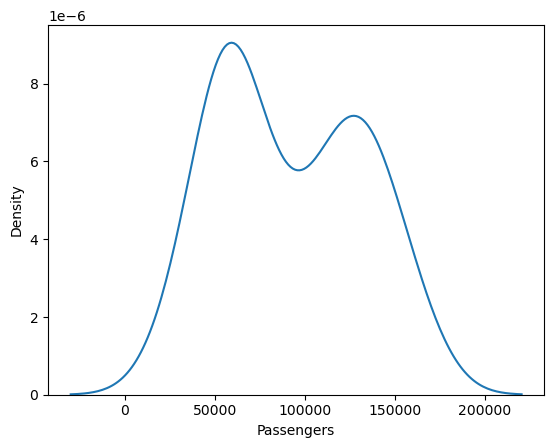

In [177]:
sns.kdeplot(df_avg_daily["Passengers"]);

In [178]:
#s
s = df_avg_daily["Passengers"].skew()
print(f'Coefficient of skewness (S): {s}')

Coefficient of skewness (S): 0.19775793370512887


In [179]:
#k = kurtosis(df_general["Population"], axis = 0, fisher = True, bias = True)
#k
k = df_avg_daily["Passengers"].kurtosis()
print(f'Kurtosis (K): {s}')

Kurtosis (K): 0.19775793370512887


In [189]:
median = np.median(df_avg_daily["Passengers"])
print(f'Median: {median}')
mean = np.mean(df_avg_daily["Passengers"])
print(f'Mean: {mean}')
maximun = max(df_avg_daily["Passengers"])
print(f'Max Value: {maximun}')
minimun = min(df_avg_daily["Passengers"])
print(f'Min Value: {minimun}')
rangev = np.ptp(df_avg_daily["Passengers"])
print(f'Range: {rangev}')

Median: 91119.0
Mean: 91840.4857142857
Max Value: 161929
Min Value: 28343
Range: 133586


In [173]:
df_avg_daily

81      62955
82     117267
83     127090
84     130399
85     135011
86     140718
87      91119
89      78379
90     133473
91     144905
92     150008
93     157594
94     161929
95     100676
97      28343
98      54602
99      58461
100     58689
101     60743
102     63198
103     42437
105     33641
106     52540
107     56754
108     58168
109     61025
110     62716
111     48592
113     62095
114    101475
115    117450
116    121427
117    126294
118    122803
119     91441
Name: Passengers, dtype: int64

In [187]:
df_avg_daily = df_avg_daily.reset_index(drop = True)

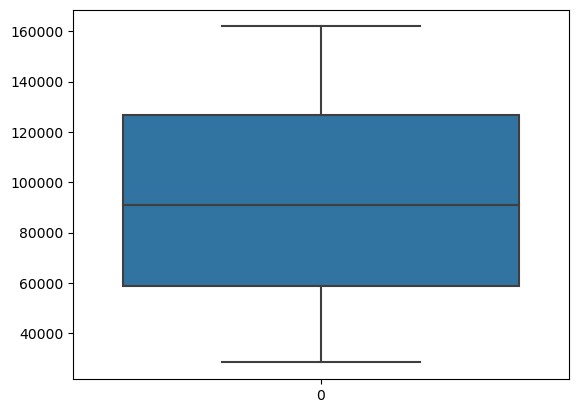

In [188]:
sns.boxplot(data = df_avg_daily["Passengers"]);

In [190]:
df_avg_daily.describe()

Year     Passengers
count    35.00000      35.000000
mean   2020.00000   91840.485714
std       1.43486   39619.786669
min    2018.00000   28343.000000
25%    2019.00000   58575.000000
50%    2020.00000   91119.000000
75%    2021.00000  126692.000000
max    2022.00000  161929.000000

In [192]:
std = np.std(df_avg_daily["Passengers"], ddof =1)
print(f'Standard deviation: {std}')

Standard deviation: 39619.78666864459


In [193]:
quantiles = np.quantile(df_avg_daily["Passengers"],[0,0.25,0.5,0.75,1])
print(f'Quantiles: {quantiles}')

Quantiles: [ 28343.  58575.  91119. 126692. 161929.]


In [194]:
q1 = np.quantile(df_avg_daily["Passengers"],0.25)
print(f'Q1: {q1}')
q2 = np.quantile(df_avg_daily["Passengers"],0.5)
print(f'Q2: {q2}')
q3 = np.quantile(df_avg_daily["Passengers"],0.75)
print(f'Q3: {q3}')

from scipy.stats import iqr
iqr = iqr(df_avg_daily["Passengers"])
print(f'IQR: {iqr}')

Q1: 58575.0
Q2: 91119.0
Q3: 126692.0
IQR: 68117.0


In [211]:
#Outliers
Outliers = df_avg_daily[((df_avg_daily["Passengers"]<(q1-1.5*iqr)) | (df_avg_daily["Passengers"]>(q3+1.5*iqr))) ]

In [213]:
print(f'Outliers_shape:  {Outliers.shape}')
print(f'df_avg_daily: {df_avg_daily.shape}')

Outliers_shape:  (0, 5)
df_avg_daily: (35, 5)


In [215]:
outliers = (df_avg_daily[~((df_avg_daily["Passengers"]<(q1-(1.5*iqr))) | (df_avg_daily["Passengers"]>(q3+(1.5*iqr)))) ] )
outliers
#No se necesita

Line_tram_type  Year Day_encoded   Week_day  Passengers
0   Average Total Flow  2018           1     Sunday       62955
1   Average Total Flow  2018           2     Monday      117267
2   Average Total Flow  2018           3    Tuesday      127090
3   Average Total Flow  2018           4  Wednesday      130399
4   Average Total Flow  2018           5   Thursday      135011
5   Average Total Flow  2018           6     Friday      140718
6   Average Total Flow  2018           7   Saturday       91119
7   Average Total Flow  2019           1     Sunday       78379
8   Average Total Flow  2019           2     Monday      133473
9   Average Total Flow  2019           3    Tuesday      144905
10  Average Total Flow  2019           4  Wednesday      150008
11  Average Total Flow  2019           5   Thursday      157594
12  Average Total Flow  2019           6     Friday      161929
13  Average Total Flow  2019           7   Saturday      100676
14  Average Total Flow  2020           1     Sunday       28343
15  Average Total Flow  2020           2     Monday       54602
16  Average Total Flow  2020           3    Tuesday       58461
17  Average Total Flow  2020           4  Wednesday       58689
18  Average Total Flow  2020           5   Thursday       60743
19  Average Total Flow  2020           6     Friday       63198
20  Average Total Flow  2020           7   Saturday       42437
21  Average Total Flow  2021           1     Sunday       33641
22  Average Total Flow  2021           2     Monday       52540
23  Average Total Flow  2021           3    Tuesday       56754
24  Average Total Flow  2021           4  Wednesday       58168
25  Average Total Flow  2021           5   Thursday       61025
26  Average Total Flow  2021           6     Friday       62716
27  Average Total Flow  2021           7   Saturday       48592
28  Average Total Flow  2022           1     Sunday       62095
29  Average Total Flow  2022           2     Monday      101475
30  Average Total Flow  2022           3    Tuesday      117450
31  Average Total Flow  2022           4  Wednesday      121427
32  Average Total Flow  2022           5   Thursday      126294
33  Average Total Flow  2022           6     Friday      122803
34  Average Total Flow  2022           7   Saturday       91441

- Q-Q plot

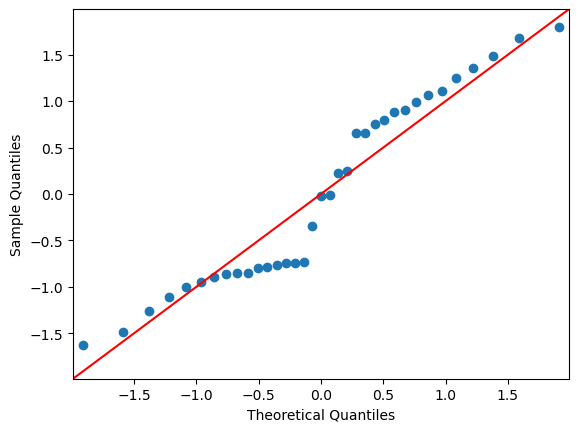

In [220]:
qqplot(df_avg_daily["Passengers"],norm, fit = True, line = "45")
plt.show()

C:\Users\ledag\AppData\Local\Temp\ipykernel_1656\2940750308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_avg_daily["Passengers"], fit = norm);


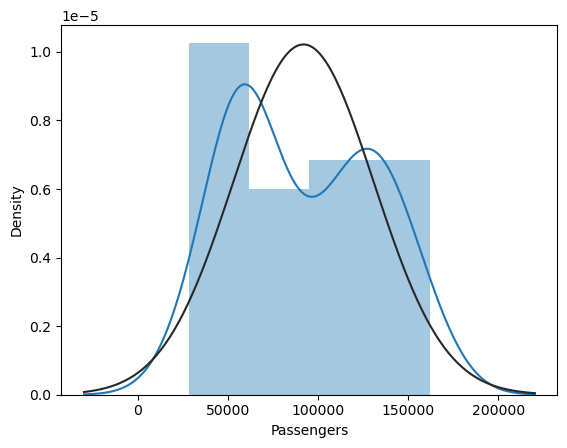

In [221]:
sns.distplot(df_avg_daily["Passengers"], fit = norm);

- Shapiro - Wilk test

Hypothesis
Ho (Accepted): The data are normally distributed (Po > 0.05)
Ha (Rejected): The data are not normally distributed 

In [222]:
shapiro(df_avg_daily["Passengers"])

ShapiroResult(statistic=0.9185521602630615, pvalue=0.012953430414199829)

# Machine Learning

- Sentimental analysis

In [107]:
a = df_final.groupby(["Luas Line","Year"])["Passengers carried"].sum()
a

Luas Line   Year
Green line  2018    19999700
            2019    24301487
            2020     9448869
            2021     9441025
            2022    18392800
Red line    2018    21837268
            2019    24045744
            2020     9727187
            2021    10040293
            2022    20275075
Name: Passengers carried, dtype: object

In [27]:
!pip install praw

In [114]:
df_final["Passengers carried"]

Year  Luas Line 
2018  Green line    19999700
      Red line      21837268
2019  Green line    24301487
      Red line      24045744
2020  Green line     9448869
      Red line       9727187
2021  Green line     9441025
      Red line      10040293
2022  Green line    18392800
      Red line      20275075
Name: Passengers carried, dtype: object

## Machine Learning

In [28]:
!pip install python-dotenv

In [29]:
import praw
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [30]:
load_dotenv()

True

In [31]:
# Get the environmental variables
APP_NAME = getenv('APP_NAME')
APP_ID = getenv("APP_ID")
APP_SECRET = getenv("APP_SECRET")
USERNAME = getenv('REDDIT_USERNAME')
#PASSWORD = getenv('PASSWORD')


In [32]:
#Testing
# Check that the variables all loaded
if APP_NAME and APP_ID and APP_SECRET and USERNAME:
    print("Credentials loaded")
else:
    print("ERROR: Credentials not loaded!!")


Credentials loaded


In [33]:
#Connecting to Reddit
reddit = praw.Reddit(
    client_id = getenv("APP_ID"),
    client_secret = getenv("APP_SECRET"),
    user_agent = f'CA_02 u/ {getenv("REDDIT_USERNAME")}',
)
    

In [34]:
print(reddit.read_only)

True


In [35]:
subreddit = reddit.subreddit("Ireland")

In [36]:
#Extracting the comments and relevant information
for post in subreddit.search("luas"):
    print("******")
    print("Text =", post.selftext)
    
    for comment in list(post.comments):
        print("Title =", post.title)
        print("Coment =", comment.body)
        print("Score =", comment.score)
        print("Comment count =", post.num_comments)
        print(dt.fromtimestamp(comment.created_utc))
        print("\n")
        print("------------------------------------------")
        
#print(subreddit.display_name)
#print(subreddit.title)
#print(subreddit.description)

******
Text = Absolutely fuming after an encounter with a Luas inspector today on the green line.

For context I always pay my fare and I‚Äôve noticed a ridiculous amount of inspections recently so I wouldn‚Äôt dream of trying to dodge it right now.

So I tagged on at home to head to town for an appointment, then when I got to Dawson street didn‚Äôt tap off because I was in a rush and the 1‚Ç¨ 90 minute fare had already come off.

Went back to Dawson about an hour later, tapped the leap card. However it tapped off instead of on without me realising, still within the 90 minutes. Then I get my ticket checked on the Luas. I think nothing of it, happens all the time.

Then he says I‚Äôm not tapped on. And I say ‚Äúum yes I did‚Äù. And he says ‚Äú well look here at my machine, it‚Äôs red it means it‚Äôs not valid.‚Äù 
So I‚Äôm like ‚Äúah yeah but look above, it‚Äôs tapped on from before and it‚Äôs within 90 minutes so it‚Äôs grand, I just mustn‚Äôt have tapped off, honest mistake‚Äù

Then h

Title = Men harassing women at luas stop in Dublin
Coment = Like what did they think was gonna happen?
They girls would just fall in love with them?
They are absolutely disgusting
Score = 330
Comment count = 280
2023-07-11 11:41:14


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Hey look, it's real people who actually think they're versatile ü•≤
Score = 87
Comment count = 280
2023-07-11 12:31:43


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Calling them men is a stretch.
Score = 335
Comment count = 280
2023-07-11 11:02:11


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = I swear people are getting worse and worse. Just scumbags.
Score = 81
Comment count = 280
2023-07-11 12:15:17


------------------------------------------
Title = Men harassing women at luas stop in Dublin
Coment = Feel bad for these women

I‚Äôm a b

Title = I worked as Luas Security for 4 Years AMA
Coment = Can you think of any reason why this type of security wouldn't work on intercity trains and Dart?
Score = 127
Comment count = 275
2023-05-14 10:32:17


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = How many times were you attacked ?
Score = 87
Comment count = 275
2023-05-14 10:36:49


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = How often were you in court as a result of your job?
Score = 146
Comment count = 275
2023-05-14 10:29:34


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment =  How much, if any, help you would like or need from commuters, if things get dicey?
Score = 66
Comment count = 275
2023-05-14 11:04:21


------------------------------------------
Title = I worked as Luas Security for 4 Years AMA
Coment = What was the worst thing you've seen?
Score = 56


Title = Teenagers in court over ‚Äòpile in‚Äô attack on Indian student on Luas
Coment = There needs to be a review of whether the youth justice strategy is working. 

I'm about 90% sure two of these teens pleaded guilty to an identical offence very recently. And there seems to be at least half a dozen incident in Tallaght where foreign students have had the shit kicked out of them by teens for no reason.
Score = 256
Comment count = 221
2023-12-08 07:16:46


------------------------------------------
Title = Teenagers in court over ‚Äòpile in‚Äô attack on Indian student on Luas
Coment = There will always be "disadvantaged background", mental health issues, lack of amenities, etc.

But who cares? If they attack random people, they shouldn't be on the streets in the first place.
Score = 211
Comment count = 221
2023-12-08 07:49:28


------------------------------------------
Title = Teenagers in court over ‚Äòpile in‚Äô attack on Indian student on Luas
Coment = Hitting someone with a vice 

Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = Saw and smelt a woman eating fish from a lunchbox. Appears as if it was reheated in work and brought on to the luas. Probably the most psychopathic thing I‚Äôve ever seen
Score = 53
Comment count = 24
2022-06-17 07:28:40


------------------------------------------
Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = A teen getting slashed across his coat luckily it was a puffer one, so the knife didn't slice him open. I've also seen a young lad starting on a granny and a guy fishing drugs out of his arse in rush hour. All on the Green Line.
Score = 23
Comment count = 24
2022-06-17 07:44:33


------------------------------------------
Title = Do you feel safe on the luas and what is the worst thing you've seen happen on it?
Coment = Saw a horse on it. Saw a lad get stabbed at the stop then get on for two stops to go to tallaght hospital. Saw

Title = Scrotes on the Luas
Coment = Obviously a scary situation, but a part of my did lol that David's first reaction was to send a tweet.
Score = 902
Comment count = 300
2021-09-28 20:21:40


------------------------------------------
Title = Scrotes on the Luas
Coment = [deleted]
Score = 327
Comment count = 300
2021-09-28 20:39:33


------------------------------------------
Title = Scrotes on the Luas
Coment = The security on the Luas look built and equipped enough to invade a country but never around when it matters.
Score = 326
Comment count = 300
2021-09-28 22:32:22


------------------------------------------
Title = Scrotes on the Luas
Coment = To think I was asked to get off the Luas because of my concealed carry Katana. Don't want me to protect Luas passengers from the barbarians at the gates? Fine I'll take my knowledge of *the blade* to Dublin bus
Score = 390
Comment count = 300
2021-09-28 22:18:32


------------------------------------------
Title = Scrotes on the Luas
Co

Title = Have you seen an act of kindness on the Luas?
Coment = A man carrying a bottle of his own piss told me that you can't bring a full bottle of piss through the airport.  Sage advice.
Score = 240
Comment count = 189
2022-08-18 14:45:47


------------------------------------------
Title = Have you seen an act of kindness on the Luas?
Coment = During the snowstorms back in 2010 the luas was one of the only reliable ways of getting in and out of town so they were packed. A very nice fella standing a few people away told me that my phone was falling out of my pocket. I thanked him and put my phone back in. He took a beat and then said ‚Äúno worries bud, if I was near you I would have robbed it‚Äù.

I think of him often.
Score = 791
Comment count = 189
2022-08-18 14:39:24


------------------------------------------
Title = Have you seen an act of kindness on the Luas?
Coment = Once saw a lad finger his missus when they were both plastered, when I was on the way home from work at like 

Title = Luas fined me for not paying a ‚Ç¨0 fare
Coment = > I was reluctant to pay on the spot, but I was told that if I didn't the fine was ‚Ç¨100, which of course I now know to not be true.

If that indeed isn't true, place a formal complaint, and follow it up. They should not be misleading people like that.

This is irrespective of whether you can appeal or not (you likely can't).
Score = 634
Comment count = 213
2023-09-26 14:47:39


------------------------------------------
Title = Luas fined me for not paying a ‚Ç¨0 fare
Coment = Wait until you see the inspectors let the shitheads go free without a fine cause they know they will give fake info. 

You basically get fucked if you follow the rules here
Score = 313
Comment count = 213
2023-09-26 16:19:29


------------------------------------------
Title = Luas fined me for not paying a ‚Ç¨0 fare
Coment = I got fined once because I had forgotten to top up my monthly card, it expired on for example 01/02 and the inspector checked it o

Title = Garda√≠ Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Aww that's lovely news for the Luas staff and security. Have they decided on a date yet? 


But seriously, great to see it is being enforced, way too many cunts out there think they're invincible and won't catch or spread that shit around.
Score = 391
Comment count = 107
2020-07-13 13:05:15


------------------------------------------
Title = Garda√≠ Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Garda√≠ have legs under there! Who knew!
Score = 190
Comment count = 107
2020-07-13 12:13:11


------------------------------------------
Title = Garda√≠ Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = Never saw Garda shorts.
Score = 56
Comment count = 107
2020-07-13 13:50:24


------------------------------------------
Title = Garda√≠ Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
Coment = T

Title = They set the Luas Ablaze
Coment = This post of the luas on fire will stay up because this is a low enough point in the modern history of Dublin that it deserves its own post. Modding tonight is a shitshow, however, so I'm locking the comments: all discussion should take place in [the megathread](https://www.reddit.com/r/ireland/comments/18282iv/public_order_gardai_dealing_with_increasingly/) pinned at the top of the sub.
Score = 1
Comment count = 1
2023-11-23 20:08:08


------------------------------------------
******
Text = No surprises but this was on the Red Line. Just passing the museum stop some scumbag who had been on since Busarus drinking cans took a notion to accost this elderly man next to me. 

I didn‚Äôt hear what he said at first when he went at him as had earphones on, but he pulled out a proper pair of handcuffs as he was trying to grab his arm, with a can of cider in the other hand.

Took off the earphones and hear him mumbling about being a Garda and he was ar

Title = Never mind, I just remembered the LUAS is free.
Coment = I'll bet that fox couldn't believe it's luck finding a nice warm room that wasn't there before.

I'd love to see the look on its face when it leaves and realises it's completely lost.
Score = 115
Comment count = 70
2023-01-12 15:01:27


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Talk to him for a side quest
Score = 293
Comment count = 70
2023-01-12 13:01:59


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Taking up two seats? He's a sly one
Score = 70
Comment count = 70
2023-01-12 14:26:39


------------------------------------------
Title = Never mind, I just remembered the LUAS is free.
Coment = Follow the fox, he‚Äôll lead you to the orchard thieves
Score = 137
Comment count = 70
2023-01-12 11:22:25


------------------------------------------
Title = Never mind, I just remembered the LUAS is fr

Title = Red Cow Luas Stop today
Coment = Jesus....that's fucking awful.

Well, the security seem to be beyond useless.
Score = 196
Comment count = 77
2023-07-12 21:15:45


------------------------------------------
Title = Red Cow Luas Stop today
Coment = At the red cow p&r? I haven't been on the luas in a while but isn't the red cow parking usually fairly busy? These guys are getting very brave if they're starting to target cars in busy parking lots.
Score = 65
Comment count = 77
2023-07-12 21:41:56


------------------------------------------
Title = Red Cow Luas Stop today
Coment = Hopefully insurance will cover it.
Score = 25
Comment count = 77
2023-07-12 21:13:51


------------------------------------------
Title = Red Cow Luas Stop today
Coment = I miss steel wheels on cars, no fucker ever stole a steely
Score = 30
Comment count = 77
2023-07-12 22:04:50


------------------------------------------
Title = Red Cow Luas Stop today
Coment = You'd probably see less damage if you left

Title = Blackhorse Luas Stop
Coment = "He's perfectly fine"

Apart from being completely lacking any critical thinking at all.
Score = 108
Comment count = 63
2023-02-01 05:10:34


------------------------------------------
Title = Blackhorse Luas Stop
Coment = And I can‚Äôt even get a drivers test booked üòÇ
Score = 26
Comment count = 63
2023-02-01 08:59:08


------------------------------------------
Title = Blackhorse Luas Stop
Coment = He cant believe it? That happens every week along that portion of the track..... Especially down near Rialto bridge.
Score = 18
Comment count = 63
2023-02-01 10:34:41


------------------------------------------
Title = Blackhorse Luas Stop
Coment = I bet he started the thought process with something like "I bet i can do that should be grand" 

Whyyy?
Score = 36
Comment count = 63
2023-02-01 01:11:01


------------------------------------------
Title = Blackhorse Luas Stop
Coment = Nice change to have a competent narrator on a Dublin-based TikTok vid

Title = Man stands infront of moving LUAS.
Coment = The amount of fuckin dumb cunts around never ceases to amaze me
Score = 216
Comment count = 125
2022-04-21 11:21:19


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = Bet he feels like a hardman for doing that too the dope.
Score = 144
Comment count = 125
2022-04-21 11:34:31


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = The ‚ÄúDon‚Äôt walk out in front of the poxy luas‚Äù at the end is giving me joy
Score = 204
Comment count = 125
2022-04-21 10:24:59


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = In this weeks episode of man vs Luas
Score = 58
Comment count = 125
2022-04-21 10:25:12


------------------------------------------
Title = Man stands infront of moving LUAS.
Coment = I know it is fashionable to give out about how much LUAS drivers make but this kind of shite is ongoing and I thin

Title = Sandyford Luas - Luas stop security
Coment = Report to gardai asap, luas security footage on doesn‚Äôt last on their system long
Score = 116
Comment count = 56
2022-09-04 09:14:52


------------------------------------------
Title = Sandyford Luas - Luas stop security
Coment = I‚Äôve no doubt they‚Äôre all little scutters out of Ballyogan , they roam the Luas up and down all day from Sandyford to Cherrywood causing disruption. 

Little degenerate shits the lot of em. They all need an unmerciful hiding with a leather belt.
Score = 34
Comment count = 56
2022-09-04 12:57:40


------------------------------------------
Title = Sandyford Luas - Luas stop security
Coment = I am sorry to hear that your daughter had terrible experience. This is not antisocial behaviour anymore its crime and it should be treated as crime. Law needs to change to treat these individuals as criminals regardless of their age.
Score = 67
Comment count = 56
2022-09-04 09:15:20


------------------------------

Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = And this is the exact problem with closing all pubs and clubs at the same time
Score = 466
Comment count = 393
2021-11-21 16:37:20


------------------------------------------
Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = I turned to my wife and said this exact thing would happen the second I heard about 12 closing time. People would go out earlier and no one is going home before 12 so every chipper and public transport option is going to be exactly the same up and down the country. 

It honestly would have made more sense to extend the opening hours as counter intuitive as it sounds at first.
Score = 142
Comment count = 393
2021-11-21 19:11:31


------------------------------------------
Title = Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Coment = They should never have made the Luas free.

Title = Found this on the Luas.
Coment = ![gif](giphy|RBAPmppHJlgpG)
Score = 79
Comment count = 64
2023-10-28 13:21:01


------------------------------------------
Title = Found this on the Luas.
Coment = They're telling me to call Jesus but they haven't even printed his phone number. Amateurs.
Score = 66
Comment count = 64
2023-10-28 13:08:53


------------------------------------------
Title = Found this on the Luas.
Coment = Acceptation üòÇüòÇüòÇüòÇüòÇ
Score = 9
Comment count = 64
2023-10-28 14:10:39


------------------------------------------
Title = Found this on the Luas.
Coment = I love the citing of biblical passages as evidence!

"If it's in a book, it's got to be true!"
Score = 30
Comment count = 64
2023-10-28 11:01:08


------------------------------------------
Title = Found this on the Luas.
Coment = As someone who used to hand stuff like this out I now cringe at the thought of it.
Score = 12
Comment count = 64
2023-10-28 19:11:45


----------------------------------

Title = Teenagers the luas
Coment = That old lady was actually 3 teenagers on an e scooter in disguise, what you saw was an elaborate drug deal
Score = 143
Comment count = 31
2023-06-11 19:05:36


------------------------------------------
Title = Teenagers the luas
Coment = Was not expecting that twist ending!
Score = 64
Comment count = 31
2023-06-11 18:48:02


------------------------------------------
Title = Teenagers the luas
Coment = [deleted]
Score = 50
Comment count = 31
2023-06-11 18:44:24


------------------------------------------
Title = Teenagers the luas
Coment = Something uplifting? On r/Ireland? On a Sunday? You filthy pervert
Score = 33
Comment count = 31
2023-06-11 19:59:28


------------------------------------------
Title = Teenagers the luas
Coment = Thought this was another antisocial luas behavior post.  Fair play to those lads.  Thanks for a positive teenager post for once. üòä
Score = 11
Comment count = 31
2023-06-11 19:55:08


-------------------------------

Title = Girl (16) kicked and kneed woman after ‚Äòfat shaming‚Äô her on Luas, court told
Coment = Scumbag
Score = 110
Comment count = 138
2023-12-12 18:34:41


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‚Äòfat shaming‚Äô her on Luas, court told
Coment = "now 18". Ye know what that means
Score = 85
Comment count = 138
2023-12-12 18:56:42


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‚Äòfat shaming‚Äô her on Luas, court told
Coment = I, as a fully grown man, was shoulder-checked by what looked like a 15 year old girl last week on the street. I couldn‚Äôt believe it and turned around saying ‚ÄúAre you ok?‚Äù As she walked away. The reply ‚Äúyeah are you fuckin okay?!‚Äù.

These she-scobes are as feral as the males.
Score = 56
Comment count = 138
2023-12-12 20:36:25


------------------------------------------
Title = Girl (16) kicked and kneed woman after ‚Äòfat shaming‚Äô her on Luas, court told


Title = Totally applicable to Luas!
Coment = Same for Dublin Bus in the city centre at rush hour. 60 people crowding the doors before letting anyone off - numpties.
Score = 54
Comment count = 64
2019-07-09 10:52:18


------------------------------------------
Title = Totally applicable to Luas!
Coment = If people are standing at the door as I'm getting off I make it a point to run them over when I'm getting out.
Score = 108
Comment count = 64
2019-07-09 11:19:28


------------------------------------------
Title = Totally applicable to Luas!
Coment = The one station you really notice this is Jervis. Pack of beasts trying to get on the tram.
Score = 45
Comment count = 64
2019-07-09 12:55:25


------------------------------------------
Title = Totally applicable to Luas!
Coment = I guess in general people need to be considerate of the fact that they are in a public space. And avoid being an inconvenience for others. I can't believe that there is a need to educate people about this. 

Eve

Title = Abuse in the Luas to tourists
Coment = The reminds me of a situation on the Red Luas line. I was standing there holding a pole when a group of young wans came on. Same type of people, loud and obnoxious with music blaring out of their phones. Anyway the tram got underway and it lurched, knocking one of them into me. That‚Äôs important, she knocked into me. 

She looks up at me and says ‚ÄòD‚Äôyou mind?!‚Äô To which I replied I didn‚Äôt. You knocked into me and I didn‚Äôt give a shit. That‚Äôs just travelling on a packed luas. She started to rip into me and I basically ignored her because fighting a fifteen year old girl isn‚Äôt a good look. When she went looking for support she asked a middle aged man nearby what he‚Äôd do if she was his daughter‚Äî and this man, this fucking hero‚Äî he said ‚ÄòIf you were my daughter you‚Äôd know better than to act like a little shit in public.‚Äô

I know nothing else about this lad, but I would die for him.
Score = 157
Comment count = 74
2023

Title = Luas Rant
Coment = I love the green line, its magnificent.
Beats the bus or driving any day
Score = 23
Comment count = 21
2023-10-13 23:25:18


------------------------------------------
Title = Luas Rant
Coment = > And today while I wait at a stop in town for 25mins with no schedule advertised to join a tram full of Ireland football fans

Someone parked on the tracks. Not even tracks that are shared with a road, literally drove along and parked in the centre of a dedicated track, blocking the Luas in both directions. What are they supposed to do?
Score = 16
Comment count = 21
2023-10-13 23:08:18


------------------------------------------
Title = Luas Rant
Coment = Red line is grim, green line is like ridding the heaven express
Score = 3
Comment count = 21
2023-10-14 09:36:27


------------------------------------------
Title = Luas Rant
Coment = Luas Redline is a disaster, all the sketchy stuff aside not nearly enough trams running to Saggart direct we have so many people tr

Title = Busker singing you've got a friend to an autistic child on the luas ‚ô•
Coment = Aww the kids giggle is magical. What a lovely man.
Score = 127
Comment count = 85
2021-03-04 16:26:31


------------------------------------------
Title = Busker singing you've got a friend to an autistic child on the luas ‚ô•
Coment = His name is Mick Mc Loughin on youtube If yous want to check him out but this is so heartwarming i thought I'd share
Original video
https://vm.tiktok.com/ZMeM8ywsc/
Score = 143
Comment count = 85
2021-03-04 15:46:59


------------------------------------------
Title = Busker singing you've got a friend to an autistic child on the luas ‚ô•
Coment = This is it... This is what the Internet was designed for.
I can rest now..
Score = 45
Comment count = 85
2021-03-04 16:47:54


------------------------------------------
Title = Busker singing you've got a friend to an autistic child on the luas ‚ô•
Coment = Ah thats gorgeous
Score = 21
Comment count = 85
2021-03-04 18:05:2

Title = Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.
Coment = They're always so brave when they're hassling ordinary people, aren't they?
Score = 191
Comment count = 266
2020-11-02 18:08:46


------------------------------------------
Title = Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.
Coment =  I'm the woman in the video with the hood up and arguing with them and I'm the one who shouted at them. They all came for me.

Here's a recording of when I got off

https://youtu.be/lXVXqSWdRsc
Score = 517
Comment count = 266
2020-11-02 19:31:13


------------------------------------------
Title = Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.
Coment = Couple of the same faces you see a lot at the far right rallies
Score = 79
Comment count = 266
2020-11-02 18:20:27


------------------------------------------
Title = Anti-Maskers protesting on the Luas. Obviously helping m

Title = Luas fine
Coment = Special Branch are going to show up to one of your lectures to arrest you.
Score = 77
Comment count = 42
2023-02-23 15:04:29


------------------------------------------
Title = Luas fine
Coment = I know a lad from Ucd who gave his Ucd student card and they requested info off the college to give him a fine to his real address as he did it several times. Hilarious stuff all together but he owed 3 fines of 100 each then.
Score = 19
Comment count = 42
2023-02-23 15:11:35


------------------------------------------
Title = Luas fine
Coment = Hope you are not planning on going to the USA or Australia after college
Score = 34
Comment count = 42
2023-02-23 14:38:27


------------------------------------------
Title = Luas fine
Coment = Hope you dont intend on ever getting a mortage, starting a family ot being happy and successful in life the Luas thing is going to hang over your head for life 

/s
Score = 14
Comment count = 42
2023-02-23 15:09:25


----------------

Title = All Luas trams evacuated amid reports of suspicious device
Coment = Jaysus, hope this is just a hoax or a false alarm.
Score = 48
Comment count = 40
2023-10-09 18:35:03


------------------------------------------
Title = All Luas trams evacuated amid reports of suspicious device
Coment = Got kicked off at Carrickmines and everyone was just standing right beside the Luas waiting as the driver started searching. Kinda scary!
Score = 35
Comment count = 40
2023-10-09 19:04:55


------------------------------------------
Title = All Luas trams evacuated amid reports of suspicious device
Coment = Services are back running again so presumably a false alarm. Scary nonetheless.
Score = 13
Comment count = 40
2023-10-09 19:32:15


------------------------------------------
Title = All Luas trams evacuated amid reports of suspicious device
Coment = Don't believe them
Don't believe them
Don't be bitten twice
You gotta suss, suss, suss, suss, suss, suss
Suss, suspect device
Score = 11
Comme

Title = Tagging Off Luas
Coment = You are assuming everyone is at max fare
Score = 40
Comment count = 15
2023-11-04 16:52:08


------------------------------------------
Title = Tagging Off Luas
Coment = It's pointless if you're at your destination and won't be using transport again for a few hours. But if you're grabbing a connection then it will "tag-off" when you mean to tag-on and the Luas stormtroopers can fine you depending on what mood they're in. Makes zero sense but it's a failing of Translink more than anything else.

If you have a tag-on in the last 90 minutes common sense should dictate you're good to go no matter what
Score = 16
Comment count = 15
2023-11-04 16:54:25


------------------------------------------
Title = Tagging Off Luas
Coment = You **must** tag-off if you are:

* changing lines
* intending to start another journey within 90 minutes (one line)/180 minutes (two lines) of your previous one starting
Score = 6
Comment count = 15
2023-11-04 17:28:06


----------

Title = Why so few Northbound Luas'?
Coment = The trams are all migrating south for the winter
Score = 16
Comment count = 16
2023-10-25 21:59:39


------------------------------------------
Title = Why so few Northbound Luas'?
Coment = The LUAS schedule is, and always has been, a total catastrophe. Green line in particular due to the brainless idea to branch the lines before Parnell.
Score = 11
Comment count = 16
2023-10-25 23:53:45


------------------------------------------
Title = Why so few Northbound Luas'?
Coment = Serious answer: Central Park is south of the Sandyford terminus so you are only getting the trams from Brides Glen there.
Score = 3
Comment count = 16
2023-10-26 12:04:28


------------------------------------------
Title = Why so few Northbound Luas'?
Coment = You realise it's a closed system right?

Fast forward 30 mintutes or so and there'll be more trams running in the opposite direction
Score = 4
Comment count = 16
2023-10-26 00:33:26


--------------------------

Title = Anti-Corruption garda returns medal after being accused of using Luas to complete Dublin marathon - Independent.ie
Coment = That is hilarious! I mean, just complete the marathon at your own pace if you have to. What is the point in striving to get some prize which is based upon a falsehood?
Score = 244
Comment count = 118
2022-11-11 15:32:34


------------------------------------------
Title = Anti-Corruption garda returns medal after being accused of using Luas to complete Dublin marathon - Independent.ie
Coment = "Luas maith, leath na hoibre...."
Score = 225
Comment count = 118
2022-11-11 15:04:15


------------------------------------------
Title = Anti-Corruption garda returns medal after being accused of using Luas to complete Dublin marathon - Independent.ie
Coment = Apparently his colleague who tried the same via the bus ended with a 37min per mile pace
Score = 210
Comment count = 118
2022-11-11 16:04:57


------------------------------------------
Title = Anti-Corruptio

Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = He has collar, maybe he's not stray, just lost?
Score = 200
Comment count = 84
2019-10-10 09:11:55


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = Hes just going to work, jesus.
Score = 469
Comment count = 84
2019-10-10 10:15:17


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = Undercover inspector
Score = 106
Comment count = 84
2019-10-10 10:09:27


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = did he pay his fare
Score = 100
Comment count = 84
2019-10-10 10:41:28


------------------------------------------
Title = There's a stray dog on the 9:00 green line Luas from broombride.
Coment = Well he‚Äôs hardly gonna drive
Score = 78
Comment count = 84
2019-10-10 11:45:03


---

Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = Is he still alive?
Score = 271
Comment count = 110
2019-03-24 10:17:30


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 358
Comment count = 110
2019-03-24 10:19:25


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 113
Comment count = 110
2019-03-24 10:17:16


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = [deleted]
Score = 94
Comment count = 110
2019-03-24 12:19:50


------------------------------------------
Title = Luas driver just stopped the tram to tell the knackers to stop blaring their speakers
Coment = How did he announce it?

Bing bong "Passengers ar

Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = [deleted]
Score = 329
Comment count = 109
2021-08-07 18:32:42


------------------------------------------
Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = I hear it's because Katherine Zappone and Leo got caught without tickets.  So Leo said it was always free and people just didn't understand.
Score = 298
Comment count = 109
2021-08-07 18:27:09


------------------------------------------
Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = Dublin Bus isn't free until tomorrow.
Score = 32
Comment count = 109
2021-08-07 17:44:28


------------------------------------------
Title = Breaking - Minister for Transport Eamon Ryan announces that the Luas is now free
Coment = Whys he announcing it when it's always been free ü§î
Score = 64
Comment count = 109
2021-08-07 20:22:30


----------------------

Title = Dublin Bus in competition with the Luas
Coment = [deleted]
Score = 178
Comment count = 103
2018-03-12 09:48:26


------------------------------------------
Title = Dublin Bus in competition with the Luas
Coment = I made the mistake of staying on past Bachelors on Saturday 

Extra fifteen minutes to get around to the front of trinity 
Score = 38
Comment count = 103
2018-03-12 10:48:28


------------------------------------------
Title = Dublin Bus in competition with the Luas
Coment = The traffic on the quays and this shite right here is why my travel time on public transport has increased by 30 minutes. Nice one Dublin City Council
Score = 53
Comment count = 103
2018-03-12 11:00:41


------------------------------------------
Title = Dublin Bus in competition with the Luas
Coment = This is what happens when you run every god damm bus and now the LUAS as well through one street and zone in the city ! Kudos to the talented and capable planners at the council and the transport aut

Title = tips on how to avoid being targeted on the luas
Coment = Stay confident. Don‚Äôt stand as if you‚Äôre scared.
Score = 40
Comment count = 75
2022-12-31 00:08:57


------------------------------------------
Title = tips on how to avoid being targeted on the luas
Coment = I wear headphones everywhere - might not have anything playing. But it makes it easier to pretend to not hear and  ignore people and they loose interest and move on when they don‚Äôt get a reaction 

Try sit / stand with other people and not alone
Score = 50
Comment count = 75
2022-12-30 23:54:36


------------------------------------------
Title = tips on how to avoid being targeted on the luas
Coment = Your body language could be making you appear an easy target:

Try keep good posture, shoulders back, chest out, head up. Try not to make yourself any smaller, manspread if you feel the need lol. Don't be afraid to hold eye contact with them and if I were you I wouldn't go on your phone as they'd probably see tha

Title = Vandals Smear Luas Signage
Coment = [deleted]
Score = 114
Comment count = 114
2016-08-11 15:12:46


------------------------------------------
Title = Vandals Smear Luas Signage
Coment = Are there signs telling old ladies to stop putting their handbags on seats?
Score = 53
Comment count = 114
2016-08-11 15:17:31


------------------------------------------
Title = Vandals Smear Luas Signage
Coment = Aye, too many pregnant women on the Luas. Need abortions to reduce the demand for seats.
Score = 82
Comment count = 114
2016-08-11 15:29:21


------------------------------------------
Title = Vandals Smear Luas Signage
Coment = [deleted]
Score = 46
Comment count = 114
2016-08-11 16:10:40


------------------------------------------
Title = Vandals Smear Luas Signage
Coment = This must rank up there with that lady who screamed at the Pro-Choice crowd in Cork that men have no right to have an opinion on abortion.

Oh God, an abortion referendum is literally the worst thing to look fo

Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Fair fucks to him. Obviously takes pride in his job.
Score = 63
Comment count = 22
2023-06-09 19:13:25


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Great day for the parish
Score = 44
Comment count = 22
2023-06-09 19:53:38


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = Tram Driving is an officially recognised event.

Metro driving isn't however and is more underground...
Score = 151
Comment count = 22
2023-06-09 21:54:27


------------------------------------------
Title = Irish Luas Driver Takes Home Gold At European Tramdriving Championships
Coment = The 10th European Tramdriver Championship

Dublin run 1 (Shauna) - https://youtu.be/GMI7UaJMwWs?t=1161

Dublin run 2 (Ian) - https://youtu.be/GMI7UaJMwWs?t=12047
Score = 12
Com

Title = What's the deal with 90 minute travel and luas tagging?
Coment = You need to tag on/off for Luas and Irish rail so your card knows when it starts or finishes a journey with them. It's always been like this.
Score = 27
Comment count = 21
2023-10-25 16:50:35


------------------------------------------
Title = What's the deal with 90 minute travel and luas tagging?
Coment = Clearly this is your first time on any train or light rail system anywhere.

Welcome to our country and I hope your next journey is less problematic.
Score = 5
Comment count = 21
2023-10-25 23:17:46


------------------------------------------
Title = What's the deal with 90 minute travel and luas tagging?
Coment = Its not that hard to just tag off
Score = 12
Comment count = 21
2023-10-25 16:49:52


------------------------------------------
Title = What's the deal with 90 minute travel and luas tagging?
Coment = So, as you see, you were wrong. You need to tag off.

You could jump on 10 Luas services as well i

Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = He was only resting on the Luas
Score = 108
Comment count = 64
2022-11-16 08:43:15


------------------------------------------
Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = The best defense for any and all transgressions
Score = 85
Comment count = 64
2022-11-16 08:33:37


------------------------------------------
Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = [deleted]
Score = 25
Comment count = 64
2022-11-16 09:30:11


------------------------------------------
Title = Garda who used Luas during Dublin Marathon claims incident was misunderstanding
Coment = He sat down to briefly rest on what appeared to be a bench when suddenly he realised it was in fact a luas seat.
Score = 25
Comment count = 64
2022-11-16 12:28:12


------------------------------------------
Title = Garda who used Luas 

Title = A strange thing happened on the Luas last night.
Coment = In scenarios like that people often feel foolish or embarrassed even if it wasnt their fault so they just get up and get on with it as they feel watched.
Score = 160
Comment count = 43
2022-09-24 10:25:07


------------------------------------------
Title = A strange thing happened on the Luas last night.
Coment = I have also heard this idea that "Ireland is a compo state". I recall it being thrown about like 10-15 years ago, headlines saying stuff like "the Irish have the second highest level of law suites/compensation claims after the U.S in the world" 

I wonder is that true or is it one of those headlines that was fed to the press by a very clearly corrupt, price fixing insurance industry!?! Or maybe we do just sue the shite out of each other. 

I did try to look it up, but couldn't find anything concrete.
Score = 30
Comment count = 43
2022-09-24 11:37:14


------------------------------------------
Title = A strange

Title = Thank you Luas Drivers
Coment = Luas drivers are super sound.

But their inability to take off or stop without sending you flying needs some work
Score = 22
Comment count = 15
2023-03-08 21:00:08


------------------------------------------
Title = Thank you Luas Drivers
Coment = This never happens in Broombridge. It's like the use the arrival of a Maynooth/Connolly train as a green light to leave the depot and leave people standing in the pissing rain.
Score = 9
Comment count = 15
2023-03-08 22:53:44


------------------------------------------
Title = Thank you Luas Drivers
Coment = So thats why the Luas was late when I was waiting at the next station?!?
Score = 23
Comment count = 15
2023-03-08 20:01:29


------------------------------------------
Title = Thank you Luas Drivers
Coment = Yeah no bother man
Score = 4
Comment count = 15
2023-03-08 19:58:22


------------------------------------------
Title = Thank you Luas Drivers
Coment = They need to be more animated. Making a

Title = I thought the luas was free!
Coment = Legitimately I have seen someone argue with the inspector that they were told it was free
Score = 18
Comment count = 27
2023-03-03 16:24:34


------------------------------------------
Title = I thought the luas was free!
Coment = Free the Luas
Score = 7
Comment count = 27
2023-03-03 17:22:38


------------------------------------------
Title = I thought the luas was free!
Coment = They have no way of getting you. Wrong name address dob you got away with it
Score = 2
Comment count = 27
2023-03-03 17:38:55


------------------------------------------
Title = I thought the luas was free!
Coment = [deleted]
Score = 1
Comment count = 27
2023-03-03 17:26:03


------------------------------------------
Title = I thought the luas was free!
Coment = Do you actually have to give them your details? What if you say no. They call the Gardai. But it‚Äôs not as if they have the right to hold you or do they?
Score = 1
Comment count = 27
2023-03-03 17:42:4

Title = On four separate occasions nobody on the Luas gave up their seat for my 8 month pregnant wife.
Coment = Tell her to ask for a seat. People either may not notice her, or they may have conditions of their own not entirely obvious that mean they need a seat too.
Score = 58
Comment count = 68
2023-09-06 20:10:11


------------------------------------------
Title = On four separate occasions nobody on the Luas gave up their seat for my 8 month pregnant wife.
Coment = There's no way in hell I'm assuming your wife is pregnant and not just fat. Unless I see a head crowning I ain't taking that chance
Score = 78
Comment count = 68
2023-09-06 20:20:54


------------------------------------------
Title = On four separate occasions nobody on the Luas gave up their seat for my 8 month pregnant wife.
Coment = You should have given her yours!
Score = 50
Comment count = 68
2023-09-06 19:49:55


------------------------------------------
Title = On four separate occasions nobody on the Luas gave

Title = Biden is blocking my luas omw to work
Coment = oh yeah, forgot he was around, that explains the Garda presence around Kilmainham the last few days, think that's the second time I've seen them patrolling the area in the 12 years I've been living there, they are mostly like in door pets I guess, they get lost and cold if they're let outside.
Score = 9
Comment count = 30
2023-04-13 17:20:00


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = It's a disgrace Joe
Score = 6
Comment count = 30
2023-04-13 17:47:48


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = God help you.
Score = 5
Comment count = 30
2023-04-13 17:41:23


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = [deleted]
Score = 15
Comment count = 30
2023-04-13 17:36:01


------------------------------------------
Title = Biden is blocking my luas omw to work
Coment = Biden you

Title = LUAS Fine
Coment = They won't look up cctv so you're in a cul de sac there. I've got fined twice and never paid them and nobody contacted me.
Score = 11
Comment count = 5
2023-04-20 09:12:05


------------------------------------------
Title = LUAS Fine
Coment = Technically you never started a journey, since you tagged off and didn't tag on. I'm sure they'll let that one slide though.
Score = 5
Comment count = 5
2023-04-20 09:10:47


------------------------------------------
Title = LUAS Fine
Coment = They're dicks. I had pretty much the same thing happen, the inspector said they had to issue the fine but appeal it and I should be alright.

I was in my shite, they point blank refused to acknowledge I may have a case despite me providing prints of the transaction times along with identical transactions over the previous weeks to show I do the same journey at the exact same time regularly.

They'll send you a snotty letter telling you how successful they are at having people pay

Title = Never have I ever seen Luas so squeaky clean!
Coment = Why do I have a sudden craving for a Cadbury's Caramel bar?
Score = 38
Comment count = 37
2021-01-21 20:50:23


------------------------------------------
Title = Never have I ever seen Luas so squeaky clean!
Coment = [deleted]
Score = 71
Comment count = 37
2021-01-21 20:32:37


------------------------------------------
Title = Never have I ever seen Luas so squeaky clean!
Coment = Must be new
Score = 13
Comment count = 37
2021-01-21 20:34:01


------------------------------------------
Title = Never have I ever seen Luas so squeaky clean!
Coment = You‚Äôd miss the scroats riding for free though. Doesn‚Äôt have that ‚ÄúI could get stabbed‚Äù feeling we know and love
Score = 21
Comment count = 37
2021-01-21 21:17:27


------------------------------------------
Title = Never have I ever seen Luas so squeaky clean!
Coment = So fresh and so clean!
Score = 10
Comment count = 37
2021-01-21 20:18:19


----------------------------

Title = Cunts bricking the Luas.
Coment = Is this shit being normalized? Some poor working man or woman is going to be blinded just for sitting by a window on their way home. I don't care who these cunts are throwing bricks or rocks: I don't care about their sob stories or the bullshit that they didn't mean it. It's make your mind up time about lunacy like this: either we reduce ourselves to victims of these animals or we eliminate their capacity to harm ordinary people. Fucking scum. 
Score = 104
Comment count = 99
2016-12-06 20:44:08


------------------------------------------
Title = Cunts bricking the Luas.
Coment = Buses out of Limerick are like that sometimes. Wee feckers horsing rocks at the bus.
Score = 22
Comment count = 99
2016-12-06 19:06:42


------------------------------------------
Title = Cunts bricking the Luas.
Coment = little bastards
Score = 32
Comment count = 99
2016-12-06 18:36:36


------------------------------------------
Title = Cunts bricking the Luas.
Comen

Title = Absolutely no crowd control on the luas.
Coment = I'll be honest. You could go to any major city and hop onto the public transport  at this time of year and you'll be in the same sardine in a can situation. 

Source: was at Christmas  markets in Vienna last weekend and brother was in London recently and we both said the same thing.
Score = 35
Comment count = 27
2022-12-13 10:16:09


------------------------------------------
Title = Absolutely no crowd control on the luas.
Coment = I take it you don‚Äôt get the luas too often. This is pretty regular especially on the red line. Good luck trying to have security on every luas
Score = 15
Comment count = 27
2022-12-13 10:16:40


------------------------------------------
Title = Absolutely no crowd control on the luas.
Coment = \>Honestly, there needs to be more security at the stops to stop people from over crowding >trams to absolutely dangerous levels.

Honestly Luas really don't give a damn about overcrowding, never have
Score 

Title = Man's jaw broken in attack at Luas anti-social blackspot
Coment = The red line is sketchy as fuck at the best of times.
Score = 59
Comment count = 101
2020-01-18 12:47:17


------------------------------------------
Title = Man's jaw broken in attack at Luas anti-social blackspot
Coment = Imagine minding your own business on a typical day and getting set upon by a gang of feral scumbags. Imagine how terrified you'd be. 

I've said it before but I'd be a fucking hanging judge if I ever got to be one. 

A gang of you attacked a person minding their own business? Fuck you 10 years in prison. 

A gang of you threatened cyclists with metal bars? Fuck you 10 years in prison. 

And so on.
Score = 44
Comment count = 101
2020-01-18 14:45:52


------------------------------------------
Title = Man's jaw broken in attack at Luas anti-social blackspot
Coment = [deleted]
Score = 28
Comment count = 101
2020-01-18 14:38:08


------------------------------------------
Title = Man's jaw broken 

Title = Are there any new Metrolink or Luas lines in planning?
Coment = The emerging preferred route for the Cork Luas was to be published last year, but has been delayed. Apparently they're looking at an option through the city centre that would involve demolition of something. After that it'll go to Public Consultation, detailed design, then planning, then construction. So it's very early in the process, but is already badly behind. They also largely dropped the idea of an intermediate BRT.

Luas Finglas is in active planning, but is an extension.

Metrolink is before ABP.

Luas Line F to Lucan is currently suspended.

The main policy documents for the cities are described as Metropolitan Area Transport Studies (so CMATS for Cork, or LSMATs for Limerick/Shannon). Dublin has the Great Dublin Area Transport Strategy.

Cork and Limerick also have some train stuff going on.
Score = 8
Comment count = 7
2023-08-22 12:37:52


------------------------------------------
Title = Are there any 

Title = Luas having a smoko at Abbey Street
Coment = They shouldn‚Äôt have made it free. Now it doesn‚Äôt work properly
Score = 21
Comment count = 20
2022-09-21 23:18:49


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = A smoko? I'm assuming it's off the tracks? I honestly don't know what I'm looking at here.
Score = 19
Comment count = 20
2022-09-21 21:52:41


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = It's on smoko, so leave it alone.
Score = 5
Comment count = 20
2022-09-22 12:01:34


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = Fucking Putin!
Score = 11
Comment count = 20
2022-09-21 22:28:27


------------------------------------------
Title = Luas having a smoko at Abbey Street
Coment = Woah! 

Anyone see what happend? Very hard break or something?
Score = 5
Comment count = 20
2022-09-21 22:33:58


-----------------------------------

Title = Luas Map Question
Coment = It's to show the routes (not lines) diverging. 

Bus√°ras -> Connolly

Bus√°ras -> The Point

This shows the routes splitting and the line no longer being spined and not having combined frequency.

As per the one at O'Connell, it shows the services that continue on towards the Broombridge interchange and then the other services that go around the loop via the bypass track at the top of O'Connell Street. 

Take it as a fork in the road

2 people walk from X to Y via Z
2 other people walk from X to A via Z
The two routes they take split after Z
So if two people take each route, on what we call "the spine" in this case, X to Z would then have a combined frequency of four.

And the one at Marlborough simply shows the connection to the red line
On other maps it's typically shown as

O'Connell GPO <--> Abbey St <--> Marlborough

Hope this helps.
Score = 6
Comment count = 12
2022-11-26 00:01:48


------------------------------------------
Title = Luas Map Qu

Title = Luas has been riddled with inspectors the last few days
Coment = I was on the Red Line yesterday and about 18 inspectors boarded at James's, they approached me and asked if I had a ticket. Before I knew what was happening they'd grabbed me and shoved me to the floor. They turned me over and pulled down my pants to reveal my bare arse. I was screaming and squawking and all of the other passengers were acting like nothing was happening. A big circle of hooting ticket inspectors had formed around me, I didn't know what was happening but I knew it wasn't good. One inspector squatted down in front of me and started and started yelling "LUAS" "FREE" over and over. No mask, just spewing pure droplets all over me. I couldn't see what was going on behind, then I felt a searing pain as I realised I was being branded! The pain of it was so intense, I felt like flames were rushing up and down my body to my bare arse. Then it all went dark. 

I woke up in bed the next morning lying in a pud

Title = Luas into Dublin later
Coment = Wonder will it still be free now that restrictions are gone
Score = 26
Comment count = 7
2022-01-22 13:19:21


------------------------------------------
Title = Luas into Dublin later
Coment = The driver has to check people don't do that. Because someone did that and It wasn't her fault so she won loads of money.
Score = 8
Comment count = 7
2022-01-22 16:07:19


------------------------------------------
Title = Luas into Dublin later
Coment = Scrotes abound tonight. Watch out people
Score = 12
Comment count = 7
2022-01-22 14:25:09


------------------------------------------
Title = Luas into Dublin later
Coment = Wouldn't be surprised if the pubs jacked up their prices!
Score = 3
Comment count = 7
2022-01-22 15:51:12


------------------------------------------
Title = Luas into Dublin later
Coment = Cases are gonna hit the roof, and before ya know it hospitals will overflow and it‚Äôll be back to square one again.
Score = 3
Comment count = 7


Title = Thrilling Garda action at Beechwood Luas stop earlier
Coment = Checking the LUAS for tax
Score = 17
Comment count = 9
2023-03-28 23:48:54


------------------------------------------
Title = Thrilling Garda action at Beechwood Luas stop earlier
Coment = Sequels never live up to expectations. https://streamable.com/lvede
Score = 6
Comment count = 9
2023-03-29 01:09:22


------------------------------------------
Title = Thrilling Garda action at Beechwood Luas stop earlier
Coment = I was on one of the following luas‚Äôs. They searched the one in front of us, rolled us forward two absolute giants of Armed gardai got on with hands on their holstered handguns and made their way down through the carriages. We were waved on and they stopped the one behind us then. Exciting stuff
Score = 2
Comment count = 9
2023-03-30 18:47:32


------------------------------------------
Title = Thrilling Garda action at Beechwood Luas stop earlier
Coment = Did the guy try to escape on the luas? Why i

In [37]:
#Creating dataframe with the information extracted
postTitles = []
postComments = []

for post in subreddit.search("luas"):
    postTitles.append(post.title)
    
    if post.selftext != "":
          postTitles.append(post.selftext)
            
    for comment in list(post.comments):
        postComments.append(comment.body)
        
        if comment.body != "" and comment.body != "[deleted]":
             postComments.append(post.selftext)
    

In [38]:
df_sent_titles = pd.DataFrame({
    "Post_title": postTitles,
})

In [39]:
df_sent_comments = pd.DataFrame({
    "Comments": postComments,
})

In [40]:
df_sent_titles

Post_title
0                 Luas Inspectors gone mad with power.
1    Absolutely fuming after an encounter with a Lu...
2           Men harassing women at luas stop in Dublin
3    I do not own this video neither do I know whic...
4            I worked as Luas Security for 4 Years AMA
..                                                 ...
138    Your friendly neighborhood Mace @ Balally Luas.
139  Thrilling Garda action at Beechwood Luas stop ...
140  A garda car tore up the tracks at the station ...
141  I'm going to build my own LUAS with blackjack ...
142  LUAS release safety video showing collisions b...

[143 rows x 1 columns]

In [41]:
df_sent_comments

Comments
0     I work at Luas we sent a red notice with Inter...
1     Absolutely fuming after an encounter with a Lu...
2     And they never tackle the absolute mutants who...
3     Absolutely fuming after an encounter with a Lu...
4     If you have the leapcard registered online, lo...
...                                                 ...
5021                                                   
5022  The fence on the footpath at 1:19, who was the...
5023                                                   
5024             Load of crap, can't see the aftermath.
5025                                                   

[5026 rows x 1 columns]

### Sentiment Analysis Post Titles
 - Text processing

In [42]:
#Converting all text into lower case
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

#Tokenizing words
#df_sent["clean_comment"]  = df_sent["Post_title"].apply(lambda x : " ".join(nltk.word_tokenize(x).split()))

df_sent_titles.head()

C:\Users\ledag\AppData\Local\Temp\ipykernel_1656\4038056384.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sent_titles["Post_title"]  = df_sent_titles["Post_title"].str.replace("[^\w\s]", "")


Post_title
0                     luas inspectors gone mad power
1  absolutely fuming encounter luas inspector tod...
2               men harassing women luas stop dublin
3              video neither know luas stop occurred
4                   worked luas security 4 years ama

In [43]:
#Using textblox
!pip install textblob

In [45]:
#Textblob
from textblob import TextBlob
df_sent_titles["Post_title"].apply(lambda x: str(TextBlob(x).correct()))

#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_titles["st"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_titles["ltz"] = df_sent_titles["Post_title"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_titles.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Post_title  \
0                     luas inspectors gone mad power   
1  absolutely fuming encounter luas inspector tod...   
2               men harassing women luas stop dublin   
3              video neither know luas stop occurred   
4                   worked luas security 4 years ama   

                                                  st  \
0                       lua inspector gone mad power   
1  absolut fume encount lua inspector today green...   
2                   men harass women lua stop dublin   
3                  video neither know lua stop occur   
4                          work lua secur 4 year ama   

                                                 ltz  
0                      luas inspector gone mad power  
1  absolutely fuming encounter luas inspector tod...  
2               men harassing woman luas stop dublin  
3              video neither know luas stop occurred  
4                    worked luas security 4 year ama

- Feauture extraction

In [46]:
freq = pd.Series(' '.join(df_sent_titles["Post_title"]).split()).value_counts()[:15]
freq

luas      165
stop       36
get        25
im         21
card       20
got        19
people     19
fine       18
line       17
one        17
fare       17
pay        16
leap       16
dont       15
dublin     15
dtype: int64

In [47]:
TextBlob(df_sent_titles["Post_title"][0]).ngrams(2)

[WordList(['luas', 'inspectors']),
 WordList(['inspectors', 'gone']),
 WordList(['gone', 'mad']),
 WordList(['mad', 'power'])]

- Model Sentiment Analysis

In [48]:
def sentiment_analysis(dataset,feauture,new_feature,score):
    
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
    
    def Result_analysis(score):
        if score < 0:
            return "Negative"
        elif score == 0:
             return "Neutral"
        else:
            return "Positive"
    
    dataset[new_feature] = dataset[feauture].apply(getPolarity)
    dataset[score] = dataset[new_feature].apply(Result_analysis)


In [49]:
sentiment_analysis(df_sent_titles,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_titles,"ltz","ltz_sentiment","ltz_score")
df_sent_titles

Post_title  \
0                       luas inspectors gone mad power   
1    absolutely fuming encounter luas inspector tod...   
2                 men harassing women luas stop dublin   
3                video neither know luas stop occurred   
4                     worked luas security 4 years ama   
..                                                 ...   
138            friendly neighborhood mace balally luas   
139  thrilling garda action beechwood luas stop ear...   
140  garda car tore tracks station pulled front tra...   
141              im going build luas blackjack pallets   
142  luas release safety video showing collisions l...   

                                                    st  \
0                         lua inspector gone mad power   
1    absolut fume encount lua inspector today green...   
2                     men harass women lua stop dublin   
3                    video neither know lua stop occur   
4                            work lua secur 4 year ama   
..                                                 ...   
138               friendli neighborhood mace balal lua   
139     thrill garda action beechwood lua stop earlier   
140  garda car tore track station pull front tram b...   
141                   im go build lua blackjack pallet   
142     lua releas safeti video show collis lua vehicl   

                                                   ltz  st_sentiment  \
0                        luas inspector gone mad power     -0.625000   
1    absolutely fuming encounter luas inspector tod...      0.128286   
2                 men harassing woman luas stop dublin      0.000000   
3                video neither know luas stop occurred      0.000000   
4                      worked luas security 4 year ama      0.000000   
..                                                 ...           ...   
138            friendly neighborhood mace balally luas      0.000000   
139  thrilling garda action beechwood luas stop ear...      0.050000   
140  garda car tore track station pulled front tram...      0.000000   
141               im going build luas blackjack pallet      0.000000   
142  luas release safety video showing collision lu...      0.000000   

     st_score  ltz_sentiment ltz_score  
0    Negative      -0.625000  Negative  
1    Positive       0.101631  Positive  
2     Neutral       0.000000   Neutral  
3     Neutral       0.000000   Neutral  
4     Neutral       0.000000   Neutral  
..        ...            ...       ...  
138   Neutral       0.375000  Positive  
139  Positive       0.116667  Positive  
140   Neutral       0.050000  Positive  
141   Neutral       0.000000   Neutral  
142   Neutral       0.000000   Neutral  

[143 rows x 7 columns]

### Sentiment Analysis Comments
 - Text processing

In [51]:
#Converting all text into lower case
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x.lower() for x in x.split()))

#Taking away any character present
df_sent_comments["Comments"]  = df_sent_comments["Comments"].str.replace("[^\w\s]", "")

#Taking away stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
df_sent_comments["Comments"]  = df_sent_comments["Comments"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

df_sent_comments.head()

C:\Users\ledag\AppData\Local\Temp\ipykernel_1656\1742252984.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sent_comments["Comments"]  = df_sent_comments["Comments"].str.replace("[^\w\s]", "")


Comments
0  work luas sent red notice interpol immediate e...
1  absolutely fuming encounter luas inspector tod...
2  never tackle absolute mutants whove never paid...
3  absolutely fuming encounter luas inspector tod...
4  leapcard registered online log theyll send ref...

In [ ]:
#Textblob
from textblob import TextBlob
df_sent_comments["Comments"].apply(lambda x: str(TextBlob(x).correct()))

#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_comments["st"] = df_sent_comments["Comments"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_comments["ltz"] = df_sent_comments["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_comments.head()

In [61]:
# #Textblob
# from textblob import TextBlob
# df_sent_comments["Comments"].apply(lambda x: str(TextBlob(x).correct()))

In [56]:
#Stemmer
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_sent_comments["st"] = df_sent_comments["Comments"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatize
nltk.download("wordnet")
from textblob import Word
df_sent_comments["ltz"] = df_sent_comments["Comments"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_sent_comments.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ledag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Comments  \
0  work luas sent red notice interpol immediate e...   
1  absolutely fuming encounter luas inspector tod...   
2  never tackle absolute mutants whove never paid...   
3  absolutely fuming encounter luas inspector tod...   
4  leapcard registered online log theyll send ref...   

                                                  st  \
0  work lua sent red notic interpol immedi extrad...   
1  absolut fume encount lua inspector today green...   
2  never tackl absolut mutant whove never paid lu...   
3  absolut fume encount lua inspector today green...   
4  leapcard regist onlin log theyll send refund c...   

                                                 ltz  
0  work luas sent red notice interpol immediate e...  
1  absolutely fuming encounter luas inspector tod...  
2  never tackle absolute mutant whove never paid ...  
3  absolutely fuming encounter luas inspector tod...  
4  leapcard registered online log theyll send ref...

In [57]:
freq = pd.Series(' '.join(df_sent_comments["Comments"]).split()).value_counts()[:15]
freq

luas      1880
get       1041
im         988
card       929
dont       869
like       765
pay        744
say        743
leap       731
fare       726
stop       695
back       682
one        673
people     654
would      613
dtype: int64

In [58]:
TextBlob(df_sent_comments["Comments"][0]).ngrams(2)

[WordList(['work', 'luas']),
 WordList(['luas', 'sent']),
 WordList(['sent', 'red']),
 WordList(['red', 'notice']),
 WordList(['notice', 'interpol']),
 WordList(['interpol', 'immediate']),
 WordList(['immediate', 'extradition']),
 WordList(['extradition', 'enjoy']),
 WordList(['enjoy', 'week'])]

In [60]:
sentiment_analysis(df_sent_comments,"st","st_sentiment","st_score")
sentiment_analysis(df_sent_comments,"ltz","ltz_sentiment","ltz_score")
df_sent_comments

Comments  \
0     work luas sent red notice interpol immediate e...   
1     absolutely fuming encounter luas inspector tod...   
2     never tackle absolute mutants whove never paid...   
3     absolutely fuming encounter luas inspector tod...   
4     leapcard registered online log theyll send ref...   
...                                                 ...   
5021                                                      
5022  fence footpath 119 moron thought putting good ...   
5023                                                      
5024                       load crap cant see aftermath   
5025                                                      

                                                     st  \
0     work lua sent red notic interpol immedi extrad...   
1     absolut fume encount lua inspector today green...   
2     never tackl absolut mutant whove never paid lu...   
3     absolut fume encount lua inspector today green...   
4     leapcard regist onlin log theyll send refund c...   
...                                                 ...   
5021                                                      
5022  fenc footpath 119 moron thought put good idea ...   
5023                                                      
5024                       load crap cant see aftermath   
5025                                                      

                                                    ltz  st_sentiment  \
0     work luas sent red notice interpol immediate e...      0.200000   
1     absolutely fuming encounter luas inspector tod...      0.128286   
2     never tackle absolute mutant whove never paid ...      0.136364   
3     absolutely fuming encounter luas inspector tod...      0.128286   
4     leapcard registered online log theyll send ref...      0.000000   
...                                                 ...           ...   
5021                                                         0.000000   
5022  fence footpath 119 moron thought putting good ...     -0.050000   
5023                                                         0.000000   
5024                       load crap cant see aftermath     -0.800000   
5025                                                         0.000000   

      st_score  ltz_sentiment ltz_score  
0     Positive       0.200000  Positive  
1     Positive       0.101631  Positive  
2     Positive       0.200000  Positive  
3     Positive       0.101631  Positive  
4      Neutral       0.000000   Neutral  
...        ...            ...       ...  
5021   Neutral       0.000000   Neutral  
5022  Negative      -0.050000  Negative  
5023   Neutral       0.000000   Neutral  
5024  Negative      -0.800000  Negative  
5025   Neutral       0.000000   Neutral  

[5026 rows x 7 columns]

<Axes: xlabel='st_score', ylabel='Count'>

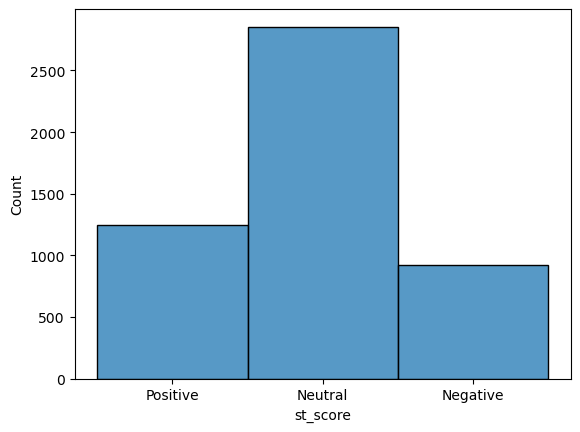

In [63]:
sns.histplot(data = df_sent_comments["st_score"])

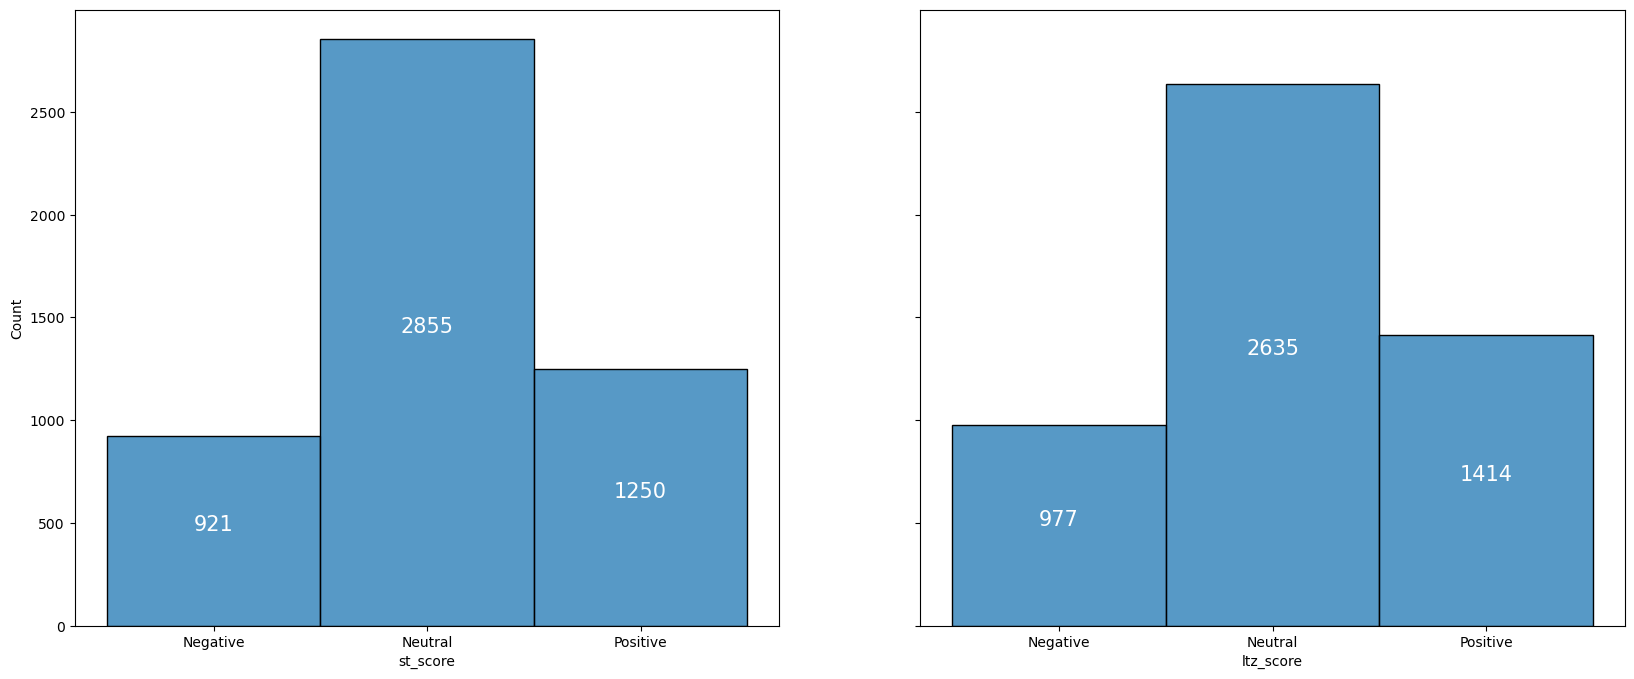

In [93]:
# Create a subplot for each year
fig, axes = plt.subplots(ncols = 2, figsize = (20, 8), sharey = True)


hist_st = sns.histplot(data = df_sent_comments["st_score"].sort_values(), ax = axes[0])

score_group = df_sent_comments.groupby("st_score")["Comments"].count()

for score in range(len(score_group)):
     hist_st.text(score, score_group[score]/2, str(score_group[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")
         
hist_ltz = sns.histplot(data = df_sent_comments["ltz_score"].sort_values(), ax = axes[1])

score_groupltz = df_sent_comments.groupby("ltz_score")["Comments"].count()

for score in range(len(score_groupltz)):
     hist_ltz.text(score, score_groupltz[score]/2, str(score_groupltz[score]),
     fontdict = dict(color = "white", fontsize = 15),
     horizontalalignment = "center")


plt.show()

In [78]:
df_sent_comments

Comments  \
0     work luas sent red notice interpol immediate e...   
1     absolutely fuming encounter luas inspector tod...   
2     never tackle absolute mutants whove never paid...   
3     absolutely fuming encounter luas inspector tod...   
4     leapcard registered online log theyll send ref...   
...                                                 ...   
5021                                                      
5022  fence footpath 119 moron thought putting good ...   
5023                                                      
5024                       load crap cant see aftermath   
5025                                                      

                                                     st  \
0     work lua sent red notic interpol immedi extrad...   
1     absolut fume encount lua inspector today green...   
2     never tackl absolut mutant whove never paid lu...   
3     absolut fume encount lua inspector today green...   
4     leapcard regist onlin log theyll send refund c...   
...                                                 ...   
5021                                                      
5022  fenc footpath 119 moron thought put good idea ...   
5023                                                      
5024                       load crap cant see aftermath   
5025                                                      

                                                    ltz  st_sentiment  \
0     work luas sent red notice interpol immediate e...      0.200000   
1     absolutely fuming encounter luas inspector tod...      0.128286   
2     never tackle absolute mutant whove never paid ...      0.136364   
3     absolutely fuming encounter luas inspector tod...      0.128286   
4     leapcard registered online log theyll send ref...      0.000000   
...                                                 ...           ...   
5021                                                         0.000000   
5022  fence footpath 119 moron thought putting good ...     -0.050000   
5023                                                         0.000000   
5024                       load crap cant see aftermath     -0.800000   
5025                                                         0.000000   

      st_score  ltz_sentiment ltz_score  
0     Positive       0.200000  Positive  
1     Positive       0.101631  Positive  
2     Positive       0.200000  Positive  
3     Positive       0.101631  Positive  
4      Neutral       0.000000   Neutral  
...        ...            ...       ...  
5021   Neutral       0.000000   Neutral  
5022  Negative      -0.050000  Negative  
5023   Neutral       0.000000   Neutral  
5024  Negative      -0.800000  Negative  
5025   Neutral       0.000000   Neutral  

[5026 rows x 7 columns]

In [81]:
df_sent_comments.groupby("st_score")["st_sentiment"].count()

st_score
Negative     921
Neutral     2855
Positive    1250
Name: st_sentiment, dtype: int64

## Text Classification